In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'Fico')

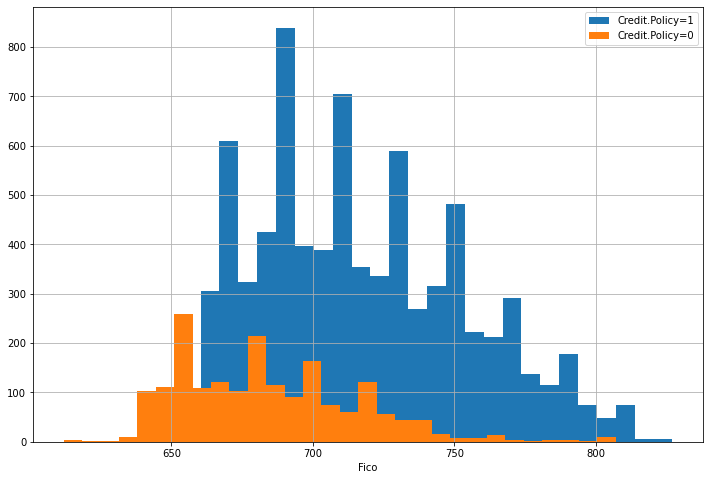

In [15]:
plt.figure(figsize=(12,8))
df[df['credit.policy'] == 1]['fico'].hist(bins = 30, label='Credit.Policy=1')
df[df['credit.policy'] == 0]['fico'].hist(bins = 30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('Fico')

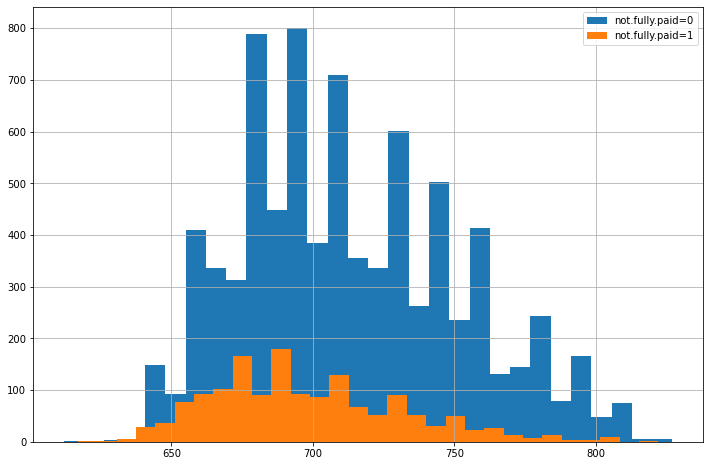

In [19]:
plt.figure(figsize=(12,8))

df[df['not.fully.paid'] == 0]['fico'].hist(bins = 30, label='not.fully.paid=0')
df[df['not.fully.paid'] == 1]['fico'].hist(bins = 30, label='not.fully.paid=1')
plt.legend()


<AxesSubplot:xlabel='purpose', ylabel='count'>

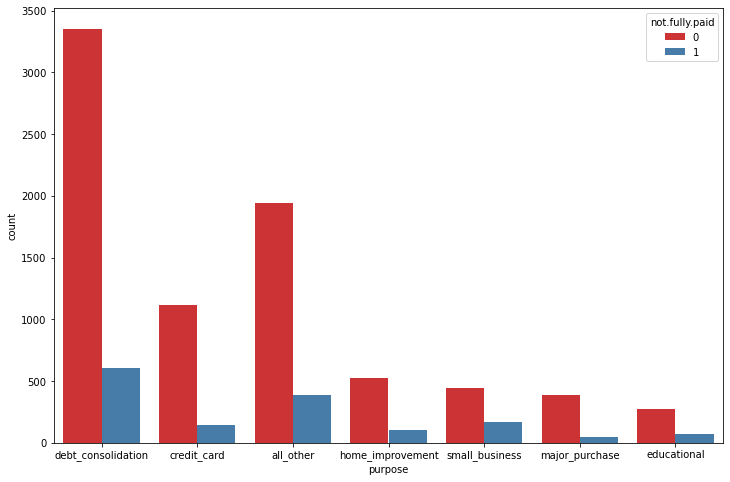

In [21]:
plt.figure(figsize=(12,8))

sns.countplot(x= 'purpose', data = df, hue='not.fully.paid',palette='Set1')

<Figure size 864x576 with 0 Axes>

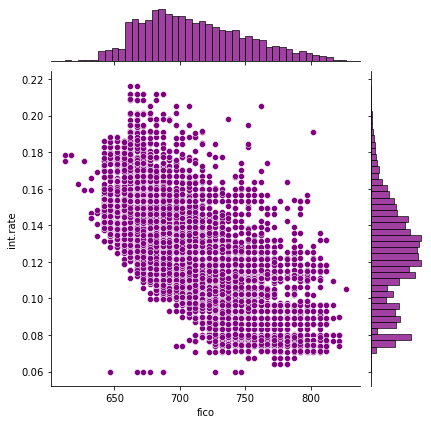

In [23]:
plt.figure(figsize=(12,8))

sns.jointplot(x = 'fico', y = 'int.rate', data = df, color='purple')

<Figure size 864x576 with 0 Axes>

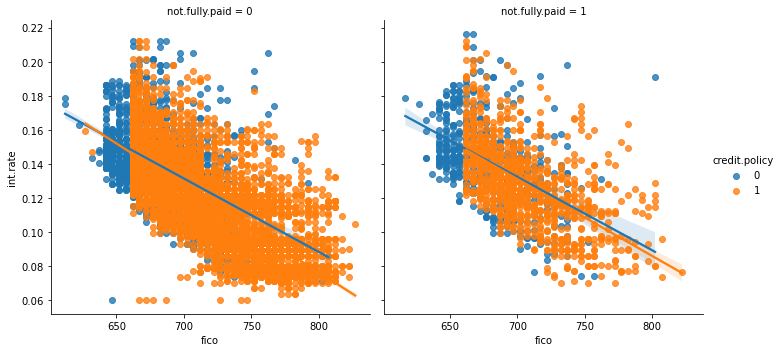

In [26]:
plt.figure(figsize=(12,8))

sns.lmplot(x='fico', y='int.rate', data = df, hue = 'credit.policy', col = 'not.fully.paid')

In [48]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

trans = pd.DataFrame(ohe.fit_transform(df[['purpose']]).toarray())

In [49]:
df = df.join(trans)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
 14  0                  9578 non-null   float64
 15  1                  9578 non-null   float64
 16  2                  9578 

In [54]:
df = df.drop('purpose', axis = 1)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('not.fully.paid', axis = 1)
y= df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X,y)

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Dokładność: 82.0%
Raport:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2018
           1       0.23      0.06      0.10       377

    accuracy                           0.82      2395
   macro avg       0.54      0.51      0.50      2395
weighted avg       0.75      0.82      0.77      2395



''

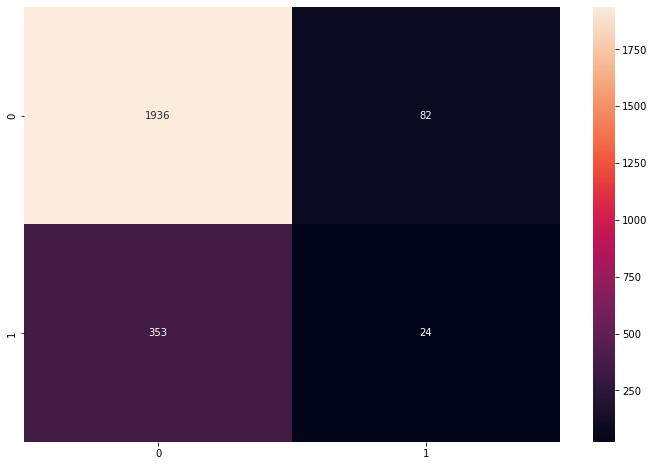

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

plt.figure(figsize = (12, 8))
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g')
;

Dokładność: 84.0%
Raport:
               precision    recall  f1-score   support

           0       0.85      1.00      0.91      2018
           1       0.56      0.03      0.05       377

    accuracy                           0.84      2395
   macro avg       0.70      0.51      0.48      2395
weighted avg       0.80      0.84      0.78      2395



''

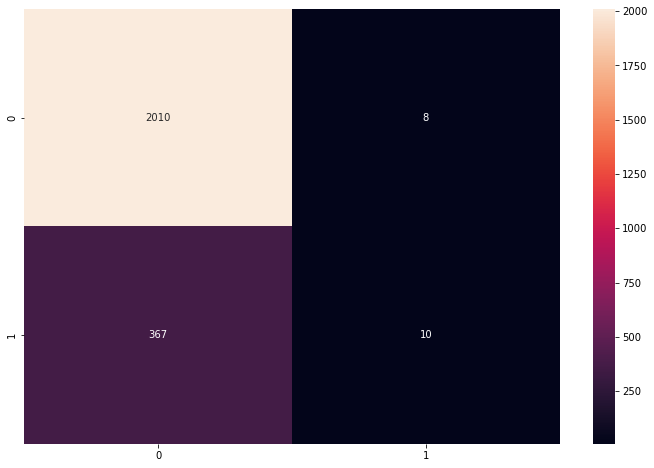

In [57]:
from sklearn.linear_model import LogisticRegression

plt.figure(figsize = (12, 8))
model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g')
;

Dokładność: 76.0%
Raport:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      2018
           1       0.26      0.30      0.28       377

    accuracy                           0.76      2395
   macro avg       0.56      0.57      0.57      2395
weighted avg       0.77      0.76      0.76      2395



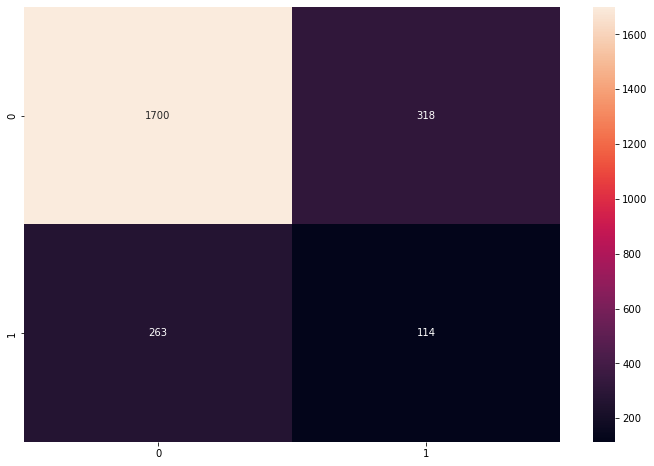

In [58]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
plt.figure(figsize = (12, 8))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

Dokładność: 84.0%
Raport:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2018
           1       0.00      0.00      0.00       377

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395



C:\Users\sparr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sparr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sparr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


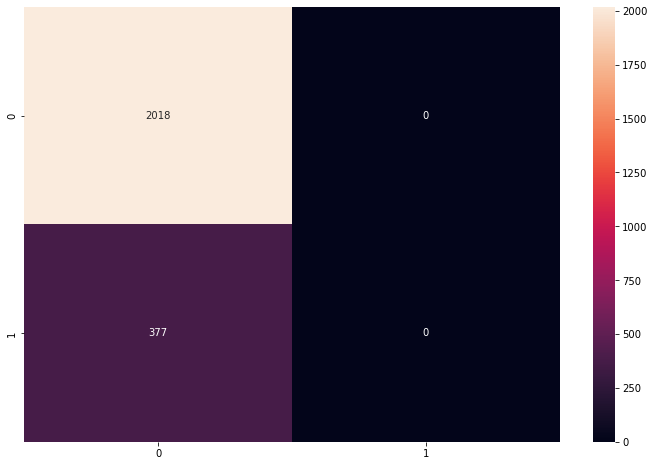

In [65]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize = (12, 8))
model = RandomForestClassifier(max_depth=3, max_leaf_nodes=4)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');

Dokładność: 83.0%
Raport:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2018
           1       0.29      0.05      0.08       377

    accuracy                           0.83      2395
   macro avg       0.57      0.51      0.49      2395
weighted avg       0.76      0.83      0.78      2395



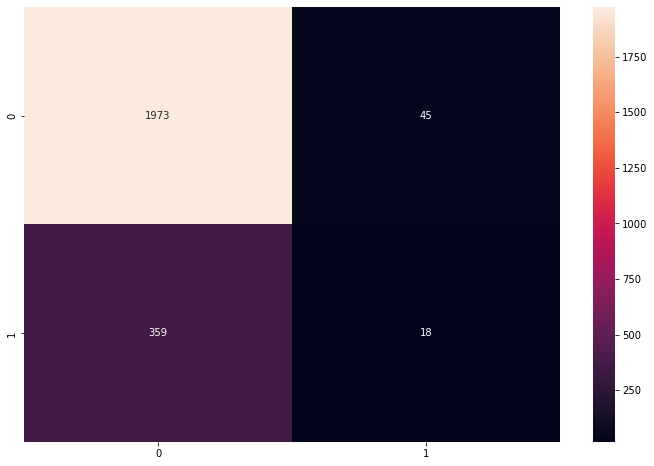

In [66]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(n_estimators = 40)
plt.figure(figsize = (12, 8))
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print('\033[1m' + f'Dokładność: {100 * round(accuracy_score(prediction, y_test), 2)}%' )
print(f'Raport:\n {classification_report(y_test, prediction)}')

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt='.5g');